In [140]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [141]:
data = pd.read_csv('mcdonalds.csv')

In [142]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [143]:
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,NaN,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,NaN,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777013,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.116842,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,57.000000,NaN,NaN


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


In [145]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [146]:
data.Age.describe([.75,.90,.95,.99])

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
50%        45.000000
75%        57.000000
90%        63.000000
95%        66.000000
99%        70.000000
max        71.000000
Name: Age, dtype: float64

In [147]:
# #Checking for the count of below variables
# print('Gender',data['Gender'].value_counts())
# print('\n \n VisitFrequency ', data['VisitFrequency'].value_counts())
# print('\n \n Like',data['Like'].value_counts())

In [148]:
# labels = ['Male','Female']
# sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
# plt.pie(sizes,labels=labels)
# plt.show()

In [149]:
# plt.rcParams['figure.figsize'] = (25, 8)
# f = sns.countplot(x=data['Age'])
# f.bar_label(f.containers[0])
# plt.title('Age distribution of customers')
# plt.show()

In [150]:
# plt.figure(figsize=(20,7))
# gender = ['Male', 'Female']
# for i in gender:
#     plt.scatter(x='Age',y='VisitFrequency', data=data[data['Gender']==i],s = 200 , alpha = 0.5 , label = i)
# plt.legend()
# plt.xlabel("Age")
# plt.ylabel("VisitFrequency")
# plt.title("VisitFrequency according to Age")
# plt.show()

In [151]:
# data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
# #Like 
# sns.catplot(x="Like", y="Age",data=data, 
#             orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
# plt.title('Likelyness of McDonald w.r.t Age')
# plt.show()

In [152]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male


In [153]:
# #Histogram of the each attributes
# plt.rcParams['figure.figsize'] = (12,14)
# data.hist()
# plt.show()

In [154]:
# #Considering only first 11 attributes
# df_eleven = data.loc[:,cat]
# df_eleven

In [155]:
#Considering only the 11 cols and converting it into array
x = data.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [156]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing

# pca_data = preprocessing.scale(x)

# pca = PCA(n_components=11)
# pc = pca.fit_transform(x)
# names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
# pf = pd.DataFrame(data = pc, columns = names)
# pf

In [157]:
# #Proportion of Variance (from PC1 to PC11)
# pca.explained_variance_ratio_

In [158]:
# np.cumsum(pca.explained_variance_ratio_)

In [159]:
# # correlation coefficient between original variables and the component

# loadings = pca.components_
# num_pc = pca.n_features_
# pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
# loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
# loadings_df['variable'] = df_eleven.columns.values
# loadings_df = loadings_df.set_index('variable')
# loadings_df

In [160]:
# #Correlation matrix plot for loadings 
# plt.rcParams['figure.figsize'] = (20,15)
# ax = sns.heatmap(loadings_df, annot=True)
# plt.show()

In [161]:
# from sklearn.cluster import KMeans
# from scipy.cluster.hierarchy import linkage, dendrogram
# from sklearn.cluster import AgglomerativeClustering
# #K-means clustering 

# kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
# data['cluster_num'] = kmeans.labels_ #adding to df
# print (kmeans.labels_) #Label assigned for each data point
# print (kmeans.inertia_) #gives within-cluster sum of squares. 
# print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
# print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

C:\Users\sathw\AppData\Local\Temp\ipykernel_19932\2761728582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Density'>

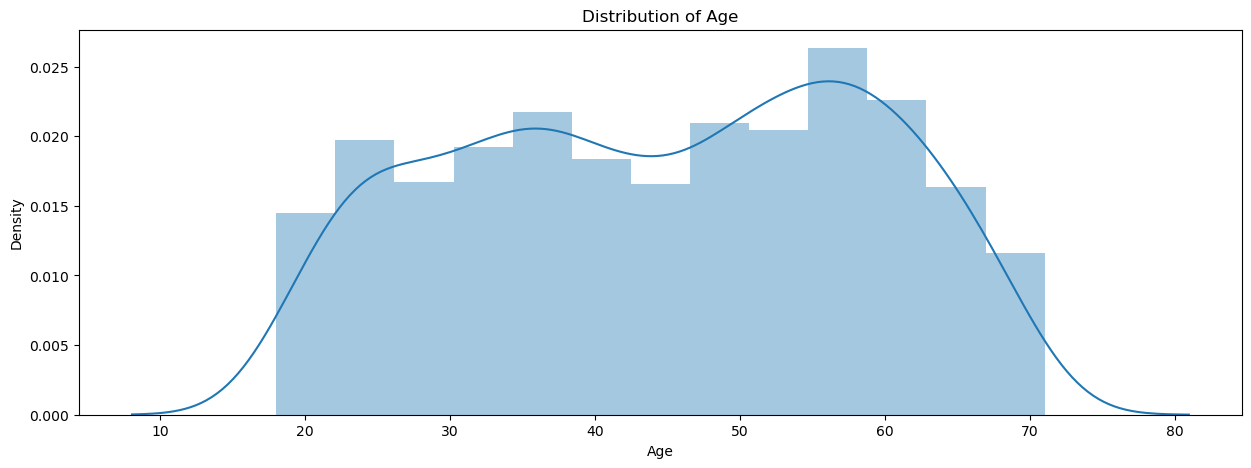

In [162]:
plt.figure(figsize=(15,5))
plt.title("Distribution of Age")
sns.distplot(data['Age'])

In [171]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
y = data['Like']
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2)
print(y)
print(len(x_train))
print(len(y_train))

0      -3
1       2
2       1
3       4
4       2
       ..
1448   -5
1449    2
1450    3
1451    4
1452   -3
Name: Like, Length: 1453, dtype: int64
1162
1162


In [173]:
#Linear regresssion
from sklearn. linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
pred_linear = reg.predict(x_test)

In [179]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)
print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 1.462
MSE: 3.620
RMSE: 1.903
R-Square: 0.626


In [183]:
from sklearn.ensemble import RandomForestRegressor
#Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(max_depth=1)
# fitting the model
rf_model.fit(x_train, y_train)
pred_rf=rf_model.predict(x_test)
pred_rf_train=rf_model.predict(x_train)
mae_rf_train = mean_absolute_error(y_train, pred_rf_train)
mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)
print('MAE_train: %.3f' % mae_rf_train)
print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE_train: 1.883
MAE: 1.807
MSE: 4.858
RMSE: 2.204
R-Square: 0.499


In [188]:
from sklearn.tree import DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(x_train, y_train)
pred_dtree = dtree_reg.predict(x_test)
mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np. sqrt(mse_dtree)
rsa_dtree = r2_score(y_test, pred_dtree)
print( 'MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print( 'RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsa_dtree)

MAE: 1.648
MSE: 4.743
RMSE: 2.178
R-Square: 0.510


In [192]:
import xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)
print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 1.597
MSE: 4.426
RMSE: 2.104
R-Square: 0.543


In [193]:
print(x_train[1])

[1 1 0 1 0 1 0 1 1 0 0]


In [194]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred_linear = reg.predict(x_test)

print(reg.predict([[1,1,0,1,0,1,0,1,1,0,0]]))

[2.9386934]


In [195]:
#dump selected model
import pickle
pickle.dump(reg, open( 'scaler.pkl', 'wb' ))